In [3]:
import cv2
import numpy as np
import time
import sys
import os
from PIL import Image, ImageDraw
from array import array 


In [4]:
model = "res10_300x300_ssd_iter_140000.caffemodel"
config = "deploy.prototxt.txt"
net = cv2.dnn.readNetFromCaffe(config, model)

labels = ["Face"]
colors = np.random.uniform(0, 255, size=(len(labels), 3))

def Face_Highlight(img):
  face_extracts = [] #Extracted Faces
  accuracy=[] 
  h, w = img.shape[:2]
  blob = cv2.dnn.blobFromImage(cv2.resize(img,(600,600)),2.0,(600,600), (104.0,117.0,123.0))
  required_size=(160, 160)
  net.setInput(blob)
  faces = net.forward()
  for i in range(0, faces.shape[2]):
    box = faces[0, 0, i, 3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")
    confidence = faces[0, 0, i, 2]
    if (confidence > 0.5):
      startX, startY = abs(startX), abs(startY)
      frame = img[startY:endY, startX:endX]
      image = Image.fromarray(frame)
      image = image.resize(required_size)
      face_array = np.asarray(image)
      face_extracts.append(face_array)
      accuracy.append(confidence)

      coord=box
  A,B,C,D=coord
  A=int(A)
  B=int(B)
  C=int(C)
  D=int(D)
  print("Coordinates:", coord)
  print("Floored Integer Coordinates:", [A,B,C,D])
  Value = {"Extracted Face": face_extracts, "Accuracy": accuracy}
  arr=cv2.rectangle(img,(A,B),(C,D),(255,0,0),2) #Takes only Integer Values,
  #arr=cv2.rectangle(img,(250,190),(350,340),(255,0,0),2) 
  image=Image.fromarray(arr)
  print(Value)
  return image
    



Coordinates: [444.40385252 129.11812216 554.92251813 286.99549288]
Floored Integer Coordinates: [444, 129, 554, 286]
{'Extracted Face': [array([[[166, 124, 131],
        [156, 115, 121],
        [139,  98, 102],
        ...,
        [215, 145, 151],
        [228, 157, 163],
        [230, 158, 164]],

       [[128,  86,  94],
        [134,  92,  99],
        [136,  94,  99],
        ...,
        [209, 139, 145],
        [155,  84,  91],
        [117,  47,  53]],

       [[164, 122, 129],
        [155, 114, 120],
        [147, 105, 110],
        ...,
        [112,  46,  50],
        [110,  41,  47],
        [103,  32,  39]],

       ...,

       [[232, 181, 185],
        [231, 179, 183],
        [229, 178, 182],
        ...,
        [165, 102, 109],
        [153,  94,  98],
        [143,  86,  89]],

       [[234, 183, 187],
        [231, 180, 184],
        [227, 176, 180],
        ...,
        [178, 116, 122],
        [155,  95, 100],
        [131,  75,  78]],

       [[237, 186, 190],


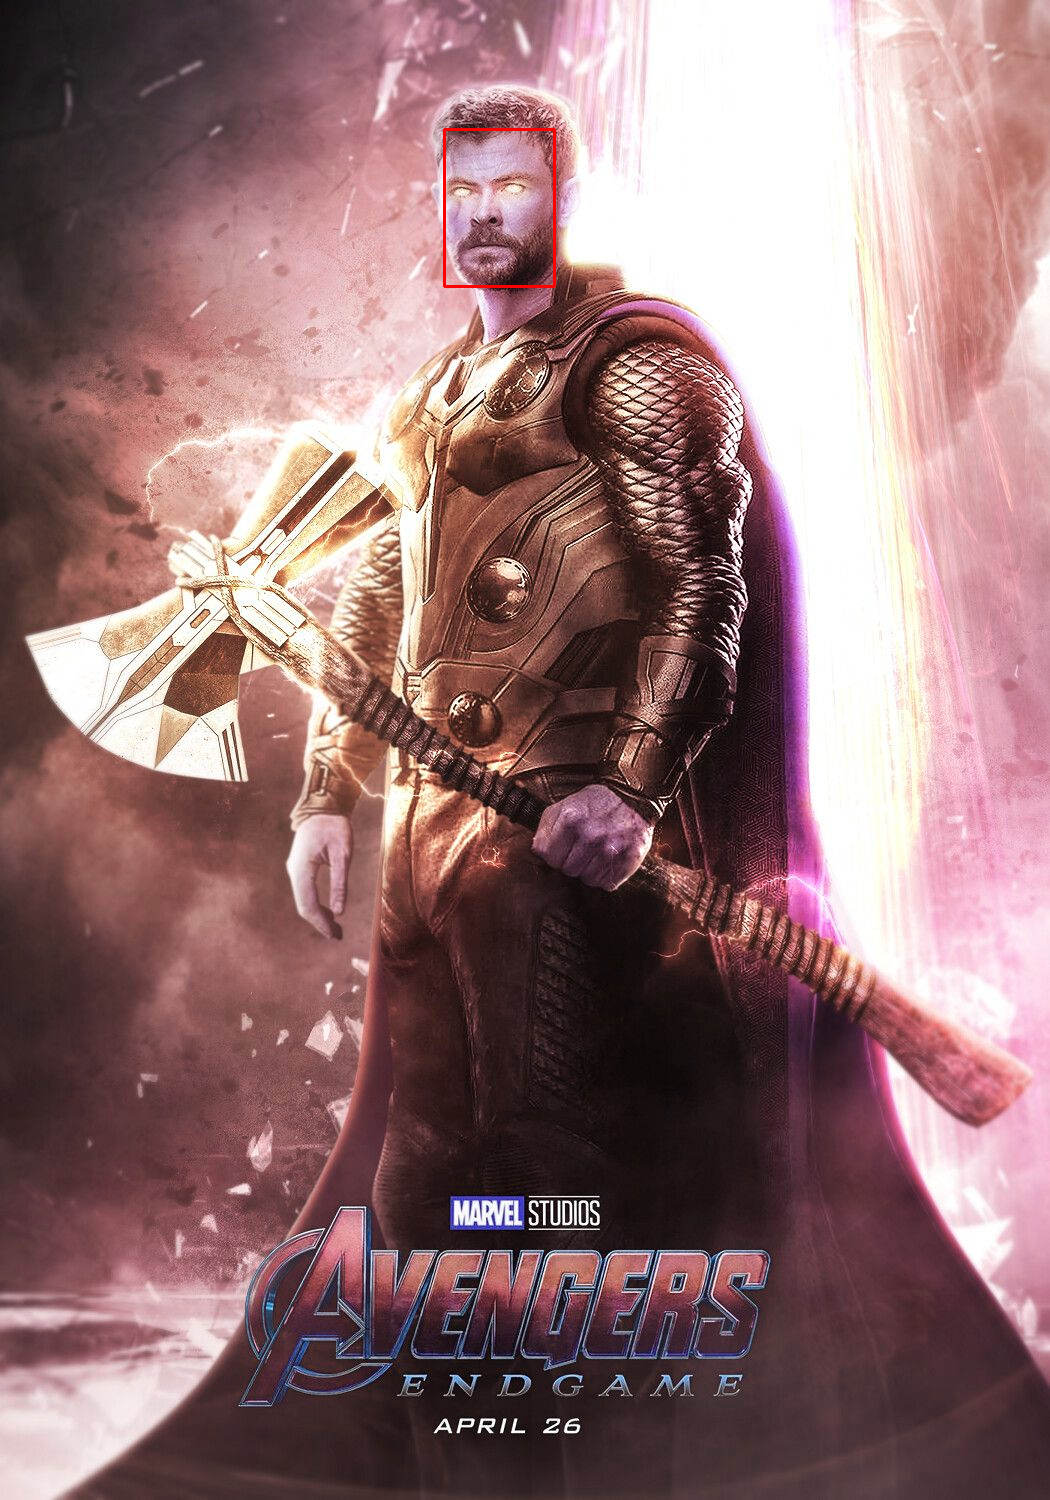

In [5]:
img=cv2.imread("Thor.jpg")
Face_Highlight(img)